### Content:
1. Import the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
  - Data Cleaning
  - Split X & y
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Performance Evaluation
  
7. Improve Model
  - Feature Extension
  - Model Performance Evaluation
  - Save the Final Model

## Inputs and function definitions

This application has been developed in a way that enables plug and play. It will run on it's own and will build the model as well. 

In [24]:
# Path to datasets
input_file_one   = 'data/nba_rookie_data.csv'

# Columns in file to be dropped
drop_col = ['Name']

# Col datatype selection to be utilized during exploratory data analysis
datatype_selection = 'auto'

# Categorical columns to be used : this is to be populated if datatype_selection variable is set to manual
categorical_features = []

# Numerical columns to be used: this is to be populated if datatype_selection variable is set to manual
numerical_features = []

# Approach to treat missing value
treat_missing_value = 'drop' 


<div class="alert alert-info" style="background-color:#F5C647; color:black; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Import the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import and download all the python libraries to be used in the model development

In [25]:

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model import LogisticRegression
from   sklearn.naive_bayes import GaussianNB
from   sklearn.neural_network import MLPClassifier
from   sklearn.preprocessing import StandardScaler

# Export model to file
import pickle

#Libraries for model evaluation
from   sklearn.metrics import classification_report, roc_auc_score, auc,accuracy_score,roc_curve,plot_roc_curve,confusion_matrix 

# Notebook Settings  options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Import the datasets

Read dataset for the task using Pandas read_csv() function.

In [3]:
# Read data in form of a csv file
df= pd.read_csv(input_file_one)

In [4]:

# Previews the first five rows of the house prices dataset
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


<div class="alert alert-info" style="background-color:#F5C647; color:black; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before delving into model development, it is essential to obtain perfect understanding of the data.

Here we would:
- Obtain the descriptive statistics of the nba_rookie_data dataset
- Obtain the information about missing values in the dataset if any

### 2.1. Descriptive Statistics

Descriptive statistics of the data. Giving information about
- Mean, median, mode 
- Min, max
- Count

In [5]:
# shape of the houseprice dataset
df.shape

(1340, 21)

(21613, 19) tells us the data has 21,613 rows and 19 columns

In [6]:
print(df.describe())

       Games Played  Minutes Played  Points Per Game  Field Goals Made  \
count   1340.000000     1340.000000      1340.000000       1340.000000   
mean      60.414179       17.624627         6.801493          2.629104   
std       17.433992        8.307964         4.357545          1.683555   
min       11.000000        3.100000         0.700000          0.300000   
25%       47.000000       10.875000         3.700000          1.400000   
50%       63.000000       16.100000         5.550000          2.100000   
75%       77.000000       22.900000         8.800000          3.400000   
max       82.000000       40.900000        28.200000         10.200000   

       Field Goal Attempts  Field Goal Percent  3 Point Made  3 Point Attempt  \
count          1340.000000         1340.000000   1340.000000      1340.000000   
mean              5.885299           44.169403      0.247612         0.779179   
std               3.593488            6.137679      0.383688         1.061847   
min      

### 2.2 Missing Values

Get the info about missing values in the house prices dataframe

In [7]:
# Missing values for every column
df.isna().sum()

Name                    0
Games Played            0
Minutes Played          0
Points Per Game         0
Field Goals Made        0
Field Goal Attempts     0
Field Goal Percent      0
3 Point Made            0
3 Point Attempt         0
3 Point Percent        11
Free Throw Made         0
Free Throw Attempts     0
Free Throw Percent      0
Offensive Rebounds      0
Defensive Rebounds      0
Rebounds                0
Assists                 0
Steals                  0
Blocks                  0
Turnovers               0
TARGET_5Yrs             0
dtype: int64

<div class="alert alert-info" style="background-color:#F5C647; color:black; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis (EDA)</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the target variable in our unique case the Target_5Yrs. 

The following will be carried out in this section:
- Generate a list of columns by their data types
- Preview the distribution of target class (Price) using a histogram
- Preview the distribution of all features 
- Explore the degree of the relationships between all features if any


### 3.1. Extract data types of columns

It is best practice to get a list of columns by data types in every data science project. this prevents you from having to manually write the name of columns while performing certain operations.

In [8]:
# Gets the list of numeric and categorical columns for house prices dataset
if datatype_selection == "auto":

    boolean_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", boolean_columns)

    categorical_features = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_features)

    categorical_columns = boolean_columns + categorical_features
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_features = categorical_features
    print("Categorical Columns : ", categorical_features)
    
    numerical_features   = numerical_features
    print("Numerical Columns : ", numerical_features)

Binary Columns :  ['TARGET_5Yrs']
Categorical Columns :  ['Name']
Numerical Columns :  ['Games Played', 'Minutes Played', 'Points Per Game', 'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percent', '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made', 'Free Throw Attempts', 'Free Throw Percent', 'Offensive Rebounds', 'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']


In [9]:
# Drop Categorical Column
col_remove = categorical_features
df = df.drop(col_remove, axis = 1)

We can see that all of the variables in the data set are numerical expect Name with the target variable being a binary column (has just true or false values)

### 3.2 Check distribution of target class (TARGET_5Yrs)

We check the distribution of target class in the dataset using a barchart in order to check if it is balanced or not

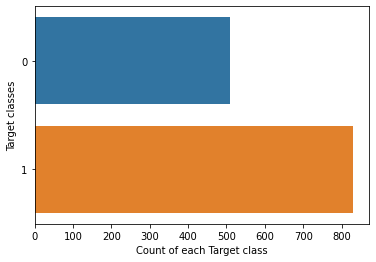

In [10]:
# Check distribution of target class
sns.countplot(y=df['TARGET_5Yrs'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 3.2 Check for the distribution of every other feature

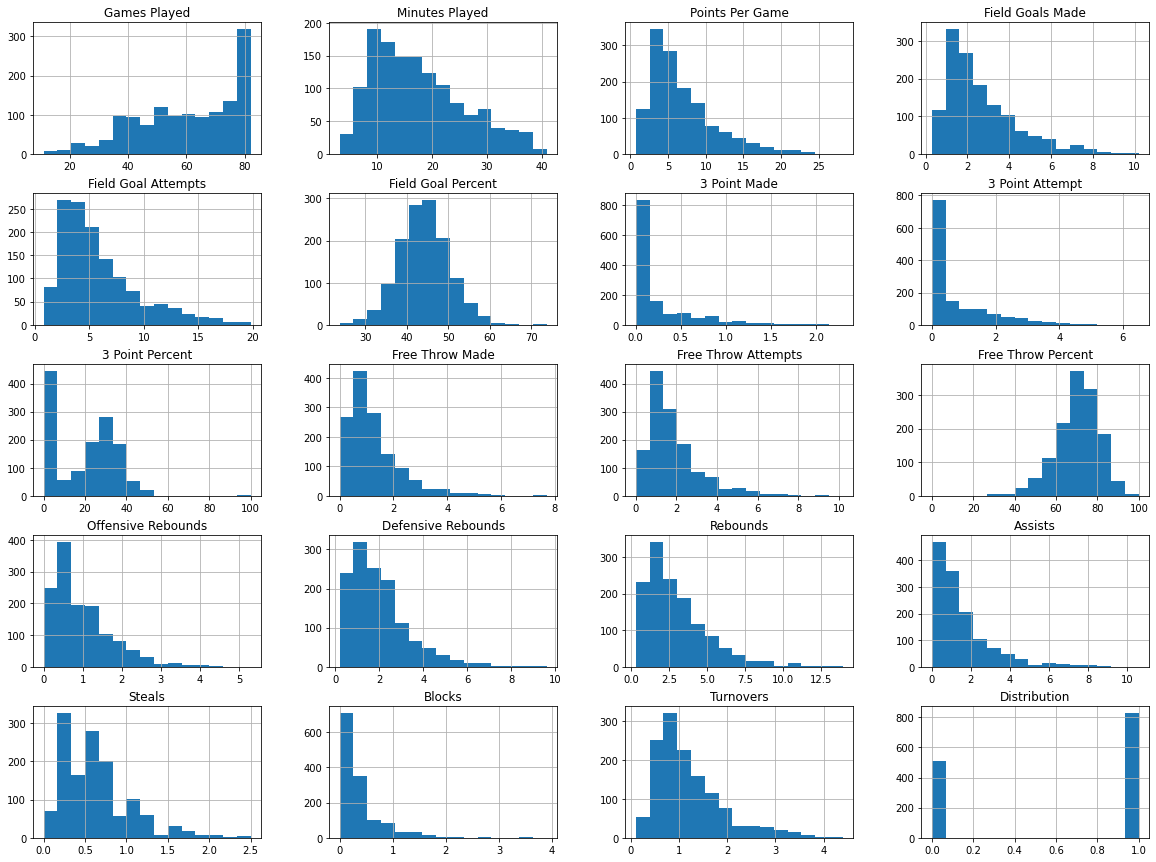

In [11]:
#plotting the histogram to visualize the distribution for all other features
df.hist(figsize=(20,15),bins = 15)
plt.title("Distribution")
plt.show()


### 3.3 Explore the degree of the relationships between all features

<AxesSubplot:>

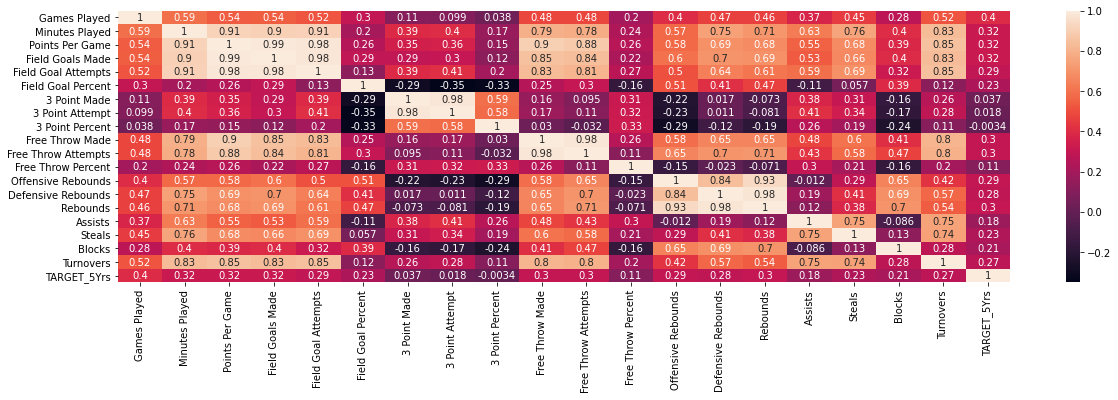

In [12]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(), annot=True)

<div class="alert alert-info" style="background-color:#F5C647; color:black; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Split the dataset into X and Y dataframe where X is a collection of all independent variables and y the dependent variable
- Split the data in train and test set

### 4.1. Data Cleaning

There are multiple ways of handling missing values. Some of the ways are:
- Drop the rows with missing values and drop columns which would not be used to train model
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

In this case, we do not have any missing values to be treated

In [13]:
# Select how you wish to treat missing values according to the input provided
if treat_missing_value == 'drop':
    
    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif treat_missing_value == 'impute': 
    
    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna("Unknown")
elif treat_missing_value == 'ignore':
    print("Ignore missing values")

(1329, 20)


### 4.2 Split the dataset X and Y dataframe where X is a collection of all independent variables and y the dependent variable

Split the X and y dataframe

In [14]:
# Split the y variable series and x variables datasetframe
y = df['TARGET_5Yrs']
X = df.drop(['TARGET_5Yrs'],axis=1)

In [15]:
#previews the first 5 rows 
y.head()

0    0
1    0
2    0
3    1
4    1
Name: TARGET_5Yrs, dtype: int64

In [16]:
#previews the first 5 rows 
X.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


### 4.3 Train - Test Split

Split the dataset in training and test set

In [17]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

<div class="alert alert-info" style="background-color:#F5C647; color:black; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data
- Model improvement through standardization and exploring other Algorithms

### 5.1 Train Model

Train the model on training data

# Logistic Regression Classifier

In [18]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [62]:
model.score(X_test,y_test)

0.6967418546365914

# Using Gaussian Naive Bayes Algorithm

In [19]:
model = GaussianNB()
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.6716791979949874

# Neural Network

In [20]:
model = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6616541353383458

# Data Scaling

In [21]:
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [26]:
scaled_nba_rookie_data = scale_data(X)
scaled_nba_rookie_data.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,-1.396466,1.171517,0.132867,-0.020616,0.471865,-1.539520,0.651138,1.235944,0.355367,0.300531,0.356433,-0.048365,-0.394923,1.012191,0.519775,0.231411,-0.537044,0.079043,0.143591
1,-1.453692,1.111452,0.087038,-0.376442,0.221689,-2.373236,1.171343,1.894176,0.261716,1.311686,1.185898,0.581052,-0.651701,-0.015746,-0.304835,1.452906,1.168699,0.312485,0.557843
2,0.778130,-0.282057,-0.371255,-0.376442,-0.334258,-0.313466,0.391035,0.859812,0.317907,-0.407277,-0.397626,-0.324927,-0.651701,-0.236018,-0.401848,-0.379336,-0.293367,-0.154398,-0.270661
3,-0.137489,-0.726539,-0.256682,-0.198529,-0.111880,-0.248077,-0.389273,-0.268585,0.205525,-0.407277,-0.397626,-0.143731,-0.009757,-0.823410,-0.547367,-0.515058,-0.049689,-0.621281,-0.270661
4,-0.709751,-0.738552,-0.531657,-0.613660,-0.806813,1.353966,-0.649376,-0.644718,-1.205486,-0.002815,0.054810,-0.286780,-0.009757,-0.382866,-0.256329,-0.854362,-0.780722,0.079043,-0.546829


In [27]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(scaled_nba_rookie_data, y, test_size = 0.20, random_state = 0)

In [28]:
model = LogisticRegression()
model.fit(X_scaled_train,y_train)
model.score(X_scaled_test,y_test)

0.7218045112781954

In [29]:
model = GaussianNB()
model.fit(X_scaled_train,y_train)
model.score(X_scaled_test,y_test)

0.6766917293233082

In [30]:
model = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1000)
model.fit(X_scaled_train,y_train)
model.score(X_scaled_test,y_test)

0.6842105263157895

# Experiments

<AxesSubplot:>

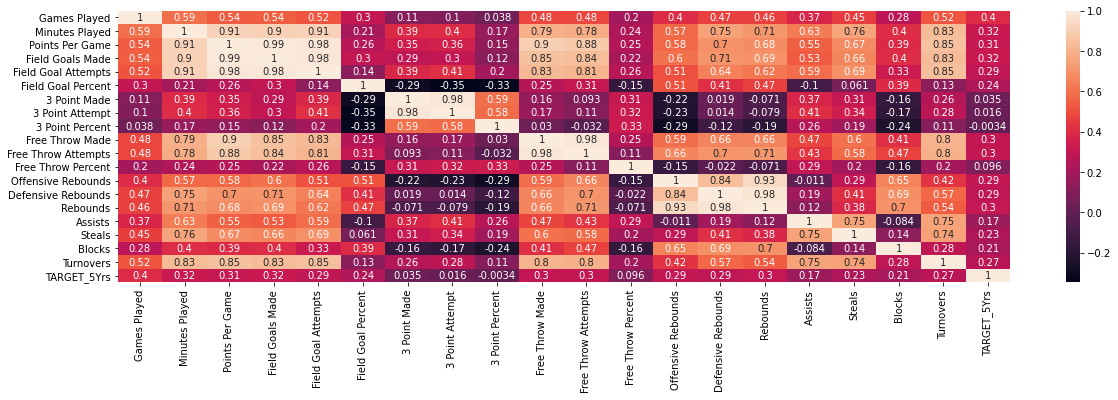

In [34]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(), annot=True)

From the correlation heatmap above, we want to drop two of the three columns that are heavily correlated with each other i.e 3 Point Made, 3 Point Attempt and 3 Point Percent

In [35]:
scaled_nba_rookie_data.drop(['3 Point Made','3 Point Attempt'],axis=1)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(scaled_nba_rookie_data, y, test_size = 0.20, random_state = 0)

In [39]:
model_ = LogisticRegression()
model_.fit(X_scaled_train,y_train)
model_.score(X_scaled_test,y_test)

0.7218045112781954

Using fewer features had no performance effect on the model developed using Logistics Regression

In [40]:
model_ = GaussianNB()
model_.fit(X_scaled_train,y_train)
model_.score(X_scaled_test,y_test)

0.6766917293233082

In [41]:
model_ = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1000)
model_.fit(X_scaled_train,y_train)
model_.score(X_scaled_test,y_test)

0.6766917293233082

Using fewer features had an adverse performance effect on both the model developed using Gaussian Naive Bayes  and Nueral Network

In [181]:
# save the model to disk
model_filename = 'model.sav'
pickle.dump(model, open(model_filename, 'wb'))